# Sample Analysis

This analysis is an example of how you can analyze the previous season data. Hopefully, that'll inform you on how to draft for the next season

In [1]:
import os
os.chdir("..")

In [2]:
import pandas as pd
from lib import ScoringSystem
from datetime import date
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("data/previous_season_data.csv")

Just a note, this data includes the whole of regular season AND post-season

In [4]:
df.shape

(27862, 24)

In [5]:
df.head()

,slug,name,team,location,opponent,outcome,seconds_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,...,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,game_score,date
0,curryst01,Stephen Curry,Team.GOLDEN_STATE_WARRIORS,Location.HOME,Team.OKLAHOMA_CITY_THUNDER,Outcome.WIN,2197,11,20,5,...,8,8,9,1,0,3,4,32,27.5,2018-10-16
1,simmobe01,Ben Simmons,Team.PHILADELPHIA_76ERS,Location.AWAY,Team.BOSTON_CELTICS,Outcome.LOSS,2565,7,14,0,...,12,15,8,4,2,3,5,19,21.7,2018-10-16
2,duranke01,Kevin Durant,Team.GOLDEN_STATE_WARRIORS,Location.HOME,Team.OKLAHOMA_CITY_THUNDER,Outcome.WIN,2263,9,21,0,...,7,8,6,1,1,3,4,27,19.6,2018-10-16
3,tatumja01,Jayson Tatum,Team.BOSTON_CELTICS,Location.HOME,Team.PHILADELPHIA_76ERS,Outcome.WIN,1736,9,17,1,...,7,9,3,1,0,1,2,23,19.1,2018-10-16
4,schrode01,Dennis Schröder,Team.OKLAHOMA_CITY_THUNDER,Location.AWAY,Team.GOLDEN_STATE_WARRIORS,Outcome.LOSS,2045,7,19,2,...,6,8,6,3,1,3,4,21,16.6,2018-10-16


Turns out we get more than just average data, but data for each player for each game. This is way better, because we can dig deeper into the data rather than looking at the surface level

In [6]:
player_slugs = df["slug"].unique()

## Points

Let's get the average value for each player, the way we normally look at player, ordered by points per game descending

In [7]:
df.groupby("slug").mean().sort_values(by="points", ascending=False)

,seconds_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,game_score
slug,,,,,,,,,,,,,,,,,
hardeja01,2218.573034,10.696629,24.415730,4.786517,13.089888,9.393258,10.741573,0.842697,5.831461,6.674157,7.404494,2.044944,0.764045,4.921348,3.202247,35.573034,26.121348
georgpa01,2228.280488,9.158537,20.914634,3.743902,9.804878,6.012195,7.182927,1.353659,6.829268,8.182927,4.097561,2.158537,0.426829,2.743902,2.865854,28.073171,21.059756
leonaka01,2128.333333,9.559524,19.345238,1.988095,5.321429,6.607143,7.642857,1.571429,6.250000,7.821429,3.488095,1.738095,0.488095,2.321429,1.702381,27.714286,22.076190
curryst01,2094.582418,9.032967,19.461538,4.901099,11.582418,4.516484,4.879121,0.681319,4.824176,5.505495,5.351648,1.274725,0.318681,2.835165,2.571429,27.483516,20.632967
jamesle01,2113.545455,10.145455,19.909091,2.018182,5.945455,5.054545,7.600000,1.036364,7.418182,8.454545,8.254545,1.309091,0.600000,3.581818,1.709091,27.363636,22.660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loftoza01,225.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-0.700000
ulisty01,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
hollajo02,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Now let's look at the standard deviation of these stats to see how they fluctuate, ordered by greatest ppg fluctuation

In [8]:
df.groupby("slug").std().sort_values(by="points", ascending=False)

,seconds_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,game_score
slug,,,,,,,,,,,,,,,,,
bookede01,405.071697,3.712778,5.750410,1.470527,2.883829,3.837440,4.366971,0.809020,2.174665,2.315354,2.947919,1.000000,0.442923,1.947730,1.385870,10.286183,8.737638
davisan02,467.659716,3.893885,6.393483,0.942503,1.846636,3.951656,4.266108,1.855494,3.906538,4.627978,2.188221,1.248376,1.436875,1.401298,1.285281,10.111842,9.481725
walkeke02,271.575290,3.712512,5.352270,1.897398,2.982257,3.619263,4.125332,0.728811,2.289529,2.382341,2.417068,1.222838,0.627580,1.735828,1.174416,10.052347,9.117261
hardeja01,265.240324,3.072623,6.154837,2.086057,3.797848,4.874838,5.316202,1.010163,2.788923,3.107086,3.346365,1.551466,0.879340,2.073780,1.262931,9.955455,9.679588
curryst01,319.666738,3.078421,5.051529,2.436094,3.660801,3.290939,3.441044,0.854779,2.253853,2.455713,2.432985,1.054787,0.555360,1.529442,1.415336,9.421444,8.837911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
qizh01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
siberjo01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
simmoko01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Interestingly, Devin Booker has the greatest fluctuation, then AD, then Kemba.

### Efficient Scoring

I also want to see points per game based on minutes played

In [9]:
df["minutes_played"] = df["seconds_played"]/60

In [10]:
df_avg = df.groupby("slug").mean()
df_avg["points_per_minute"] = df_avg["points"]/df_avg["minutes_played"]
df_avg.sort_values(by="points_per_minute", ascending=False)[["minutes_played", "points_per_minute"]]

,minutes_played,points_per_minute
slug,,
qizh01,0.950000,2.105263
hardeja01,36.976217,0.962052
duvaltr01,1.861111,0.895522
antetgi01,33.014176,0.827579
embiijo01,33.182000,0.796818
...,...,...
kingge03,5.900000,0.000000
whiteok01,2.088889,0.000000
ulisty01,0.816667,0.000000


Obviously, players who have low minutes might randomly do better. If I played for 2 minutes once, and scored 2 points, I would seem like a god in this scenario. So let's arbitrarily show players who played more than 5 minutes per game, which we know removes end-of-the-bench type players

In [11]:
df_avg[df_avg["minutes_played"] > 5].sort_values(by="points_per_minute", ascending=False)[["minutes_played", "points_per_minute"]]

,minutes_played,points_per_minute
slug,,
hardeja01,36.976217,0.962052
antetgi01,33.014176,0.827579
embiijo01,33.182000,0.796818
curryst01,34.909707,0.787274
davisan02,33.034821,0.784886
...,...,...
acyqu01,12.291667,0.138305
moreler01,5.491026,0.126080
evansja01,8.043750,0.093240


In [12]:
df_avg[df_avg["minutes_played"] > 5].sort_values(by="points_per_minute", ascending=False)[["minutes_played", "points_per_minute"]].head(20).reset_index()

,slug,minutes_played,points_per_minute
0,hardeja01,36.976217,0.962052
1,antetgi01,33.014176,0.827579
2,embiijo01,33.182000,0.796818
3,curryst01,34.909707,0.787274
4,davisan02,33.034821,0.784886
5,leonaka01,35.472222,0.781295
6,jamesle01,35.225758,0.776808
7,duranke01,34.924630,0.768003
8,bookede01,35.033333,0.758206
9,georgpa01,37.138008,0.755915


Harden was hyper efficient. The gap between him and Giannis (2nd) in points per minute is greater than the gap between Giannis and Kyrie (16th). Interesting argument for MVP that season.

### Scoring Improvements

Let's try to find the rate of scoring improvement for all players

In [13]:
import numpy as np

In [14]:
from tqdm import tqdm

def get_player_stat_fit(player_slug, stat="points"):
    df_player = df[df["slug"] == player_slug]
    N = df_player.shape[0]
    m, c = np.linalg.lstsq(np.dstack((np.arange(N), np.ones(N)))[0], df_player[stat].values)[0]
    return m, c

player_ppg_improvement = []
for player_slug in tqdm(player_slugs, desc="Each player"):
    m, c = get_player_stat_fit(player_slug)
    player_ppg_improvement.append((player_slug, m, c))

df_ppg_improvement = pd.DataFrame(player_ppg_improvement, columns=["slug", "slope", "y-intercept"])

Each player:   0%|          | 0/530 [00:00<?, ?it/s]/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
Each player: 100%|██████████| 530/530 [00:02<00:00, 185.77it/s]


In [15]:
df_ppg_improvement.sort_values(by="slope", ascending=False)

,slug,slope,y-intercept
469,bradlto01,7.5,-1.833333e+00
500,hicksis01,5.0,-1.000000e+00
511,zellety01,2.4,1.666667e+00
529,matenya01,2.0,-2.405856e-16
507,joneste01,2.0,-2.405856e-16
...,...,...,...
491,terryem01,-2.0,5.333333e+00
462,youngni01,-2.1,5.400000e+00
524,sampsja02,-2.2,2.330000e+01
497,delgaan01,-3.0,3.000000e+00


This shows all players' improvements. Let's plot the top guy `bradlto01` and see what it looks like

In [16]:
def plot_player_stat(player_slug, stat="points"):
    df_player = df[df["slug"] == player_slug]
    N = df_player.shape[0]
    m, c = np.linalg.lstsq(np.dstack((np.arange(N), np.ones(N)))[0], df_player[stat].values)[0]
    x = np.arange(N)
    plt.scatter(range(N), df_player[stat].values,color='r',marker='d')
    plt.plot(x, m*x+c)
    plt.xlabel("Number of games")
    plt.ylabel(stat.replace("_", " "))
    plt.show()

/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


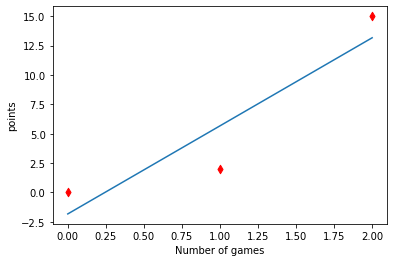

In [17]:
plot_player_stat("bradlto01")

In [18]:
def get_name_from_slug(slug):
    print(df[df["slug"] == slug]["name"].unique()[0])

In [19]:
get_name_from_slug("bradlto01")

Tony Bradley


Well, Tony Bradley only played 3 games. Let's filter for players who has played at least half the season (41 games)

In [20]:
df_player_game_count = df.groupby("slug").count()["name"]
df_player_game_count[df_player_game_count >= 42]

slug
adamsst01    85
adebaba01    82
aldrila01    88
allenja01    85
aminual01    97
             ..
youngth01    85
youngtr01    81
zelleco01    49
zizican01    59
zubaciv01    63
Name: name, Length: 354, dtype: int64

In [21]:
player_ppg_improvement = []
for player_slug in tqdm(df_player_game_count[df_player_game_count >= 42].index.values, desc="Each player"):
    m, c = get_player_stat_fit(player_slug)
    player_ppg_improvement.append((player_slug, m, c))

df_ppg_improvement = pd.DataFrame(player_ppg_improvement, columns=["slug", "slope", "y-intercept"])

Each player:   0%|          | 0/354 [00:00<?, ?it/s]/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
Each player: 100%|██████████| 354/354 [00:01<00:00, 193.45it/s]


In [22]:
df_ppg_improvement.sort_values(by="slope", ascending=False)

,slug,slope,y-intercept
92,dorsety01,0.241750,0.485544
186,kaminfr01,0.232308,3.273936
328,valanjo01,0.221735,10.249796
250,noahjo01,0.211328,2.763012
170,jacksfr01,0.210894,1.787943
...,...,...,...
145,hernaju01,-0.159203,11.370526
134,hardati02,-0.167832,23.432168
226,mcgruro01,-0.171986,13.210764
81,davisan02,-0.191456,31.193609


/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


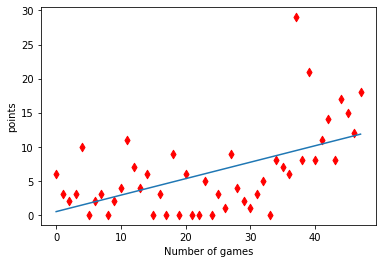

Tyler Dorsey


In [23]:
plot_player_stat("dorsety01")
get_name_from_slug("dorsety01")

/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


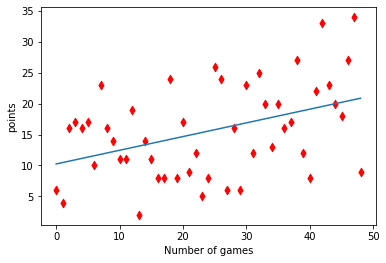

Jonas Valančiūnas


In [24]:
plot_player_stat("valanjo01")
get_name_from_slug("valanjo01")

The slope tells you how a player has improved, and the y-intercept tells you how goood they were to begin with. While Tyler Dorsey has improved more than JV has improved, JV started at a better rate while results in him ultimately having higher stats at the end of the season.

/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


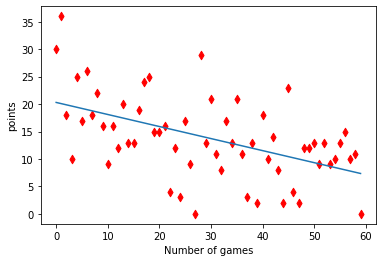

Nikola Mirotić


In [25]:
plot_player_stat("mirotni01")
get_name_from_slug("mirotni01")

Conversely, Mirotic started off pretty decent, and had a pretty steep dropoff by the end of the season

Let's concat this dataframe with our average dataframe

In [26]:
df_avg_with_improvement = pd.concat((df_avg, df_ppg_improvement.set_index("slug")), axis=1)
df_avg_with_improvement = df_avg_with_improvement.dropna()
df_avg_with_improvement.head()

,seconds_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,total_rebounds,...,steals,blocks,turnovers,personal_fouls,points,game_score,minutes_played,points_per_minute,slope,y-intercept
adamsst01,1996.647059,5.988235,10.011765,0.000000,0.035294,1.752941,3.529412,4.741176,4.623529,9.364706,...,1.435294,0.952941,1.694118,2.552941,13.729412,13.577647,33.277451,0.412574,-0.068634,16.612038
adebaba01,1399.463415,3.414634,5.926829,0.036585,0.182927,2.024390,2.756098,2.012195,5.268293,7.280488,...,0.865854,0.792683,1.475610,2.475610,8.890244,9.329268,23.324390,0.381157,0.056998,6.581840
aldrila01,1998.227273,8.397727,16.363636,0.147727,0.602273,4.272727,5.056818,3.068182,6.147727,9.215909,...,0.545455,1.295455,1.715909,2.272727,21.215909,17.320455,33.303788,0.637042,0.044724,19.270429
allenja01,1557.341176,4.164706,7.058824,0.070588,0.529412,2.517647,3.505882,2.423529,5.882353,8.305882,...,0.541176,1.447059,1.305882,2.317647,10.917647,11.025882,25.955686,0.420626,-0.029939,12.175103
aminual01,1664.628866,3.041237,7.237113,1.144330,3.412371,1.824742,2.154639,1.453608,5.865979,7.319588,...,0.793814,0.443299,0.907216,1.824742,9.051546,8.216495,27.743814,0.326255,-0.015872,9.813381


Let's see players who's PPG is similar to JV's, and how they performed through the season

In [27]:
df_avg_with_improvement = df_avg_with_improvement.sort_values(by=["points", "slope"], ascending=False).reset_index()
df_avg_with_improvement = df_avg_with_improvement.rename(columns={"index": "slug"})

In [28]:
jv_index = df_avg_with_improvement[df_avg_with_improvement["slug"] == "valanjo01"].index[0]
df_avg_with_improvement[jv_index-5:jv_index+5][["slug", "points", "slope", "y-intercept"]]

,slug,points,slope,y-intercept
61,paulch01,15.840580,-0.000585,15.860455
62,tatumja01,15.681818,-0.030467,17.007150
63,capelca01,15.653846,-0.080818,18.765336
64,nurkiju01,15.625000,0.043813,14.069635
65,goberru01,15.581395,0.017435,14.840417
66,valanjo01,15.571429,0.221735,10.249796
67,bledser01,15.548387,-0.011280,16.067261
68,jacksre01,15.476744,0.020105,14.622294
69,schrode01,15.392857,-0.015541,16.037815
70,brogdma01,15.380282,-0.008115,15.664319


Interestingly, Capela ranks higher than JV in ppg, but he has a somewhat significant negative slope. Let's look at how Capela played through this season

/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


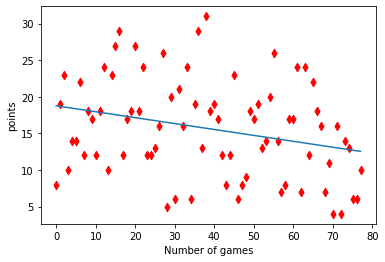

Clint Capela


In [29]:
plot_player_stat("capelca01")
get_name_from_slug("capelca01")

While he started the season off strong, his points per game decreased through the season while JV's stats went up, even though Capela's PPG average is higher than JV's. This type of improvement/decrease is important to note for drafting the following season

## Rebounds

Let's quickly look at rebounds

/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


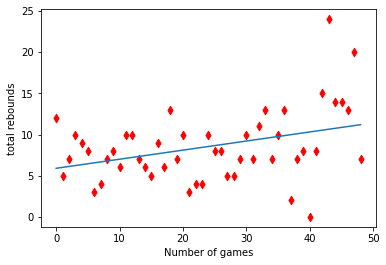

Jonas Valančiūnas


In [30]:
plot_player_stat("valanjo01", stat="total_rebounds")
get_name_from_slug("valanjo01")

/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


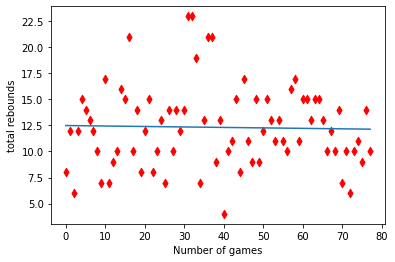

Clint Capela


In [31]:
plot_player_stat("capelca01", stat="total_rebounds")
get_name_from_slug("capelca01")

JV improved on rebounds as well. Capela is surprisingly really consistent throughout the year with his rebounds, having maybe only a slight dip

## Fantasy Points

Let's calculate the fantasy score for each game for each player

In [32]:
df["fantasy_points"] = df.apply(lambda row: int(ScoringSystem.score_head_to_head_points(row)), axis=1)

In [33]:
mean_fantasy_points = df["fantasy_points"].mean()
mean_fantasy_points

20.869966262292728

In [34]:
df.sort_values(by="fantasy_points", ascending=False).head(10)

,slug,name,team,location,opponent,outcome,seconds_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,...,assists,steals,blocks,turnovers,personal_fouls,points,game_score,date,minutes_played,fantasy_points
15064,hardeja01,James Harden,Team.HOUSTON_ROCKETS,Location.AWAY,Team.NEW_YORK_KNICKS,Outcome.WIN,2400,17,38,5,...,4,5,0,5,3,61,48.5,2019-01-23,40.000000,95
19598,hardeja01,James Harden,Team.HOUSTON_ROCKETS,Location.HOME,Team.MIAMI_HEAT,Outcome.WIN,2632,16,32,8,...,10,4,1,4,1,58,52.2,2019-02-28,43.866667,92
11410,townska01,Karl-Anthony Towns,Team.MINNESOTA_TIMBERWOLVES,Location.AWAY,Team.MIAMI_HEAT,Outcome.WIN,2224,12,24,3,...,7,3,6,3,6,34,37.3,2018-12-30,37.066667,90
22122,antetgi01,Giannis Antetokounmpo,Team.MILWAUKEE_BUCKS,Location.HOME,Team.PHILADELPHIA_76ERS,Outcome.LOSS,2172,15,26,3,...,7,2,1,1,1,52,50.4,2019-03-17,36.200000,89
21790,hardeja01,James Harden,Team.HOUSTON_ROCKETS,Location.HOME,Team.PHOENIX_SUNS,Outcome.WIN,2502,12,25,3,...,11,6,3,6,3,41,38.4,2019-03-15,41.700000,89
16500,hardeja01,James Harden,Team.HOUSTON_ROCKETS,Location.AWAY,Team.UTAH_JAZZ,Outcome.WIN,2382,12,22,4,...,5,6,4,5,4,43,41.7,2019-02-02,39.700000,89
11686,nurkiju01,Jusuf Nurkić,Team.PORTLAND_TRAIL_BLAZERS,Location.AWAY,Team.SACRAMENTO_KINGS,Outcome.WIN,2253,5,10,0,...,7,5,5,4,4,24,34.9,2019-01-01,37.550000,88
13594,bealbr01,Bradley Beal,Team.WASHINGTON_WIZARDS,Location.HOME,Team.TORONTO_RAPTORS,Outcome.LOSS,3276,17,36,6,...,15,3,2,4,3,43,36.5,2019-01-13,54.600000,88
22605,hardeja01,James Harden,Team.HOUSTON_ROCKETS,Location.AWAY,Team.MEMPHIS_GRIZZLIES,Outcome.LOSS,2737,18,39,9,...,8,2,2,3,3,57,44.2,2019-03-20,45.616667,86
11011,davisan02,Anthony Davis,Team.NEW_ORLEANS_PELICANS,Location.HOME,Team.DALLAS_MAVERICKS,Outcome.WIN,2578,20,32,0,...,4,2,2,1,3,48,44.3,2018-12-28,42.966667,85


Out of the top 10 games, James Harden has 5 of the highest fantasy points. What a fantasy god

Let's look at players who has the top total fantasy points

In [35]:
df.groupby(["slug", "name", "team"]).sum().sort_values(by="fantasy_points", ascending=False).head(20)["fantasy_points"]

slug       name                   team                       
hardeja01  James Harden           Team.HOUSTON_ROCKETS           5136
antetgi01  Giannis Antetokounmpo  Team.MILWAUKEE_BUCKS           4810
jokicni01  Nikola Jokić           Team.DENVER_NUGGETS            4510
westbru01  Russell Westbrook      Team.OKLAHOMA_CITY_THUNDER     4233
lillada01  Damian Lillard         Team.PORTLAND_TRAIL_BLAZERS    4167
duranke01  Kevin Durant           Team.GOLDEN_STATE_WARRIORS     4040
georgpa01  Paul George            Team.OKLAHOMA_CITY_THUNDER     3988
curryst01  Stephen Curry          Team.GOLDEN_STATE_WARRIORS     3970
leonaka01  Kawhi Leonard          Team.TORONTO_RAPTORS           3884
embiijo01  Joel Embiid            Team.PHILADELPHIA_76ERS        3876
drumman01  Andre Drummond         Team.DETROIT_PISTONS           3780
vucevni01  Nikola Vučević         Team.ORLANDO_MAGIC             3724
townska01  Karl-Anthony Towns     Team.MINNESOTA_TIMBERWOLVES    3721
simmobe01  Ben Simmons      

Ranking players by total fantasy points, Harden wins out and unsurprisingly Giannis is second.

The following team has 2 players in the top 20: Warriors, OKC, 76ers, Spurs, and Raptors

### Fantasy Points Per Minute Played

Now let's look at how a player's fantasy value changed over time

In [36]:
def get_player_stat_fit(player_slug, stat="points"):
    df_player = df[df["slug"] == player_slug]
    N = df_player.shape[0]
    m, c = np.linalg.lstsq(np.dstack((np.arange(N), np.ones(N)))[0], df_player[stat].values)[0]
    return m, c

In [37]:
player_fp_improvement = []
for player_slug in tqdm(df_player_game_count[df_player_game_count >= 42].index.values, desc="Each player"):
    m, c = get_player_stat_fit(player_slug, stat="fantasy_points")
    player_fp_improvement.append((player_slug, m, c))

df_fp_improvement = pd.DataFrame(player_fp_improvement, columns=["slug", "slope", "y-intercept"])
df_fp_improvement.sort_values(by="slope", ascending=False)

Each player:   0%|          | 0/354 [00:00<?, ?it/s]/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.
Each player: 100%|██████████| 354/354 [00:02<00:00, 165.67it/s]


,slug,slope,y-intercept
250,noahjo01,0.551819,7.830565
27,bendedr01,0.543447,0.815911
342,willike04,0.527598,5.629047
328,valanjo01,0.401224,20.513469
347,wrighde01,0.384865,6.960000
...,...,...,...
239,morrima02,-0.242127,25.378968
145,hernaju01,-0.297098,23.059298
226,mcgruro01,-0.308277,25.382632
234,mirotni01,-0.404140,37.772131


This includes all players. Let's look at players who started off with y-intercept >= 20, meaning they started off as approximately average

In [38]:
df_fp_improvement[df_fp_improvement["y-intercept"] >= 20].sort_values(by="slope", ascending=False)

,slug,slope,y-intercept
328,valanjo01,0.401224,20.513469
270,paytoel01,0.307431,23.316722
15,balllo01,0.279833,21.053191
91,doncilu01,0.250498,30.968417
166,ingrabr01,0.244472,23.092888
...,...,...,...
239,morrima02,-0.242127,25.378968
145,hernaju01,-0.297098,23.059298
226,mcgruro01,-0.308277,25.382632
234,mirotni01,-0.404140,37.772131


We'll graph the top 3 players that has improved the most based on fantasy points through the season

/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


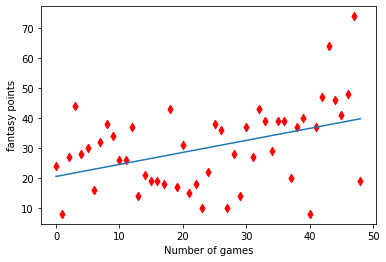

Jonas Valančiūnas




/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


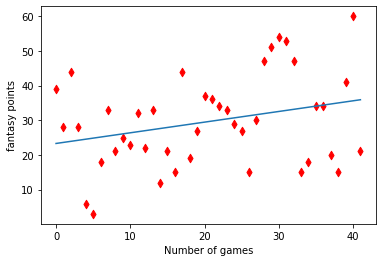

Elfrid Payton




/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


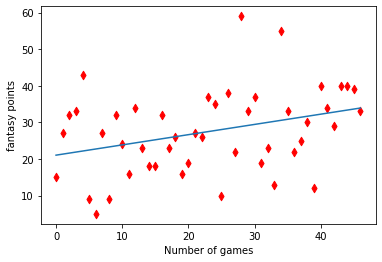

Lonzo Ball




In [39]:
for slug in df_fp_improvement[df_fp_improvement["y-intercept"] >= 20].sort_values(by="slope", ascending=False).head(3)["slug"]:
    plot_player_stat(slug, stat="fantasy_points")
    get_name_from_slug(slug)
    print("\n")

JV, Elfrid Payton, and Lonzo Ball are 3 players who has started decently, and still improved. These may be dark horses to be drafted for next season

Here is the list of 10 players who has the most improved stats based on fantasy points throughout the season

In [40]:
for slug in df_fp_improvement[df_fp_improvement["y-intercept"] >= 20].sort_values(by="slope", ascending=False).head(10)["slug"]:
    print(df.loc[df["slug"] == slug, "name"].unique()[0])

Jonas Valančiūnas
Elfrid Payton
Lonzo Ball
Luka Dončić
Brandon Ingram
Trae Young
Marvin Bagley
Rajon Rondo
Kyle Anderson
Draymond Green


It's important to remember that these improved stats doesn't mean the players necessarily got better. They just might have seen an increase in minutes, or seen a significant coaching change, or even a team change. 

## For Raptors

Let's look at one team, and look at how players perform through the season.

In [41]:
df["team"].unique()

array(['Team.GOLDEN_STATE_WARRIORS', 'Team.PHILADELPHIA_76ERS',
       'Team.BOSTON_CELTICS', 'Team.OKLAHOMA_CITY_THUNDER',
       'Team.NEW_ORLEANS_PELICANS', 'Team.CHARLOTTE_HORNETS',
       'Team.PHOENIX_SUNS', 'Team.NEW_YORK_KNICKS',
       'Team.TORONTO_RAPTORS', 'Team.MINNESOTA_TIMBERWOLVES',
       'Team.DETROIT_PISTONS', 'Team.SACRAMENTO_KINGS',
       'Team.BROOKLYN_NETS', 'Team.UTAH_JAZZ', 'Team.DENVER_NUGGETS',
       'Team.HOUSTON_ROCKETS', 'Team.ORLANDO_MAGIC', 'Team.MIAMI_HEAT',
       'Team.MILWAUKEE_BUCKS', 'Team.CLEVELAND_CAVALIERS',
       'Team.SAN_ANTONIO_SPURS', 'Team.DALLAS_MAVERICKS',
       'Team.LOS_ANGELES_CLIPPERS', 'Team.INDIANA_PACERS',
       'Team.MEMPHIS_GRIZZLIES', 'Team.ATLANTA_HAWKS',
       'Team.WASHINGTON_WIZARDS', 'Team.PORTLAND_TRAIL_BLAZERS',
       'Team.LOS_ANGELES_LAKERS', 'Team.CHICAGO_BULLS'], dtype=object)

In [42]:
df_raptors = df[df["team"] == "Team.TORONTO_RAPTORS"]

def get_player_stat_fit(player_slug, stat="points"):
    df_player = df_raptors[df_raptors["slug"] == player_slug]
    N = df_player.shape[0]
    m, c = np.linalg.lstsq(np.dstack((np.arange(N), np.ones(N)))[0], df_player[stat].values)[0]
    return m, c

raptor_fp_improvement = []
for player_slug in tqdm(df["slug"].unique(), desc="Each game"):
    m, c = get_player_stat_fit(player_slug, stat="fantasy_points")
    raptor_fp_improvement.append((player_slug, m, c))
    
df_raptor_fp = pd.DataFrame(raptor_fp_improvement, columns=["slug", "slope", "y-intercept"])
df_raptor_fp[df_raptor_fp["y-intercept"] >= 10].sort_values(by="slope", ascending=False)

Each game:   0%|          | 0/530 [00:00<?, ?it/s]/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
Each game: 100%|██████████| 530/530 [00:01<00:00, 425.56it/s]


,slug,slope,y-intercept
388,wrighde01,0.228571,10.432653
90,leonaka01,0.073059,43.206162
105,siakapa01,0.069337,29.236813
212,anunoog01,-0.012691,13.791923
94,gasolma01,-0.017959,26.760000
213,powelno01,-0.023005,14.690189
117,greenda02,-0.036269,21.589011
150,vanvlfr01,-0.043896,23.011747
51,lowryky01,-0.069833,37.814232
169,ibakase01,-0.117941,33.567100


Let's look at the top 3 Raptors that improved the most during the season

In [43]:
def plot_raptor_stat(player_slug, stat="points"):
    df_player = df_raptors[df_raptors["slug"] == player_slug]
    N = df_player.shape[0]
    m, c = np.linalg.lstsq(np.dstack((np.arange(N), np.ones(N)))[0], df_player[stat].values)[0]
    x = np.arange(N)
    plt.scatter(range(N), df_player[stat].values,color='r',marker='d')
    plt.plot(x, m*x+c)
    plt.xlabel("Number of games")
    plt.ylabel(stat.replace("_", " "))
    plt.show()

/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


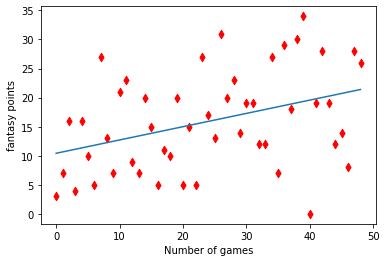

Delon Wright


/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


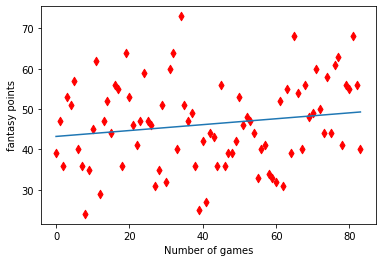

Kawhi Leonard


/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


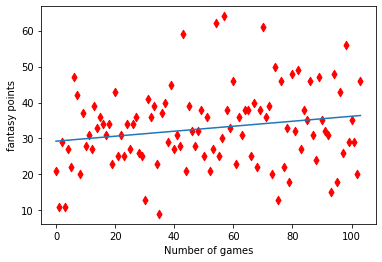

Pascal Siakam


In [44]:
for slug in df_raptor_fp[df_raptor_fp["y-intercept"] >= 10].sort_values(by="slope", ascending=False).head(3)["slug"]:
    plot_raptor_stat(slug, stat="fantasy_points")
    get_name_from_slug(slug)

The 3 most improved Raptor are Delon Wright, Kawhi, and Spicy P. Kawhi is somehow the second most improved Raptor in the season. Delon Wright improved as time went on, then was traded before the deadline.

Let's look at JV

/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


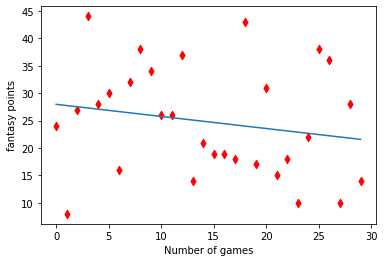

Jonas Valančiūnas


In [45]:
plot_raptor_stat("valanjo01", stat="fantasy_points")
get_name_from_slug("valanjo01")

Despite JV having an overall improvement, his stats actually decreased continuously as his time on the Raptors continued. The fact that he's one of the most improved player mid-season shows that the trade was actually very good for him.

Now let's look at the players that got worse

/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


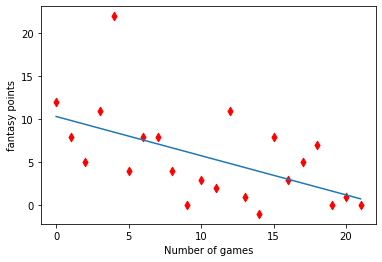

Jodie Meeks


/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


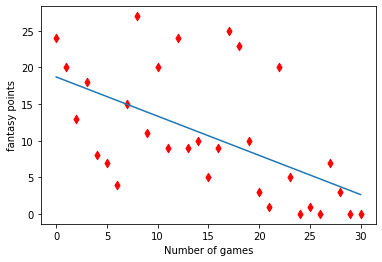

Jeremy Lin


In [46]:
for slug in df_raptor_fp[df_raptor_fp["y-intercept"] >= 10].sort_values(by="slope", ascending=False).tail(2)["slug"]:
    plot_raptor_stat(slug, stat="fantasy_points")
    get_name_from_slug(slug)

I never liked Jodie Meeks anyways

## Fantasy Points per Minute

Player minutes may increase or decrease through the season, but that may not be because the players are bad, but because of other reasons such as coaching, trades, injuries, etc. If fantasy points is a somewhat reliable statistical indicator of a player's performance, we can look a fantasy points per minute and see how that fluctuates to see a player's efficiency through the games

In [47]:
df["fantasy_per_minute"] = df["fantasy_points"]/df["minutes_played"]

In [48]:
def get_player_stat_fit(player_slug, stat="points"):
    df_player = df[df["slug"] == player_slug]
    N = df_player.shape[0]
    m, c = np.linalg.lstsq(np.dstack((np.arange(N), np.ones(N)))[0], df_player[stat].values)[0]
    return m, c

Let's look at the average fantasy per minute

In [49]:
mean_fantasy_per_minute = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)["fantasy_per_minute"].mean()
mean_fantasy_per_minute

0.8603688047360476

We'll list out all fantasy per minute, ranked by the players that has improved the most according to fantasy points per minute

In [50]:
player_improvement = []
for player_slug in tqdm(df_player_game_count[df_player_game_count >= 42].index.values, desc="Each player"):
    m, c = get_player_stat_fit(player_slug, stat="fantasy_per_minute")
    player_improvement.append((player_slug, m, c))

df_improvement = pd.DataFrame(player_improvement, columns=["slug", "slope", "y-intercept"])
df_improvement.sort_values(by="slope", ascending=False)

Each player:   0%|          | 0/354 [00:00<?, ?it/s]/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.
Each player: 100%|██████████| 354/354 [00:02<00:00, 160.28it/s]


,slug,slope,y-intercept
250,noahjo01,0.015476,0.803940
214,luwawti01,0.011809,0.153764
342,willike04,0.009516,0.436526
27,bendedr01,0.009257,0.411949
245,mykhasv01,0.008828,0.407065
...,...,...,...
84,dekkesa01,-0.009493,0.966700
189,kiddgmi01,-0.010416,1.129305
54,caldejo01,NaN,NaN
215,lylestr01,NaN,NaN


Let's look at players who started with approximately average fantasy_per_minute stats, and has improved the most, so that the improvements means more

In [51]:
df_improvement[df_improvement["y-intercept"] >= mean_fantasy_per_minute].sort_values(by="slope", ascending=False)

,slug,slope,y-intercept
91,doncilu01,0.007905,0.955091
286,robinmi01,0.005917,0.982553
270,paytoel01,0.004919,0.860815
322,townska01,0.004707,1.278375
38,bookede01,0.004140,1.005067
...,...,...,...
20,baynear01,-0.006151,1.003529
234,mirotni01,-0.008076,1.201191
59,cartewe01,-0.008119,1.148104
84,dekkesa01,-0.009493,0.966700


In [52]:
def plot_player_stat(player_slug, stat="points"):
    df_player = df[df["slug"] == player_slug]
    N = df_player.shape[0]
    m, c = np.linalg.lstsq(np.dstack((np.arange(N), np.ones(N)))[0], df_player[stat].values)[0]
    x = np.arange(N)
    plt.scatter(range(N), df_player[stat].values,color='r',marker='d')
    plt.plot(x, m*x+c)
    plt.xlabel("Number of games")
    plt.ylabel(stat.replace("_", " "))
    plt.show()

/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


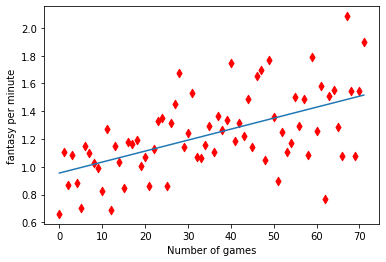

Luka Dončić


/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


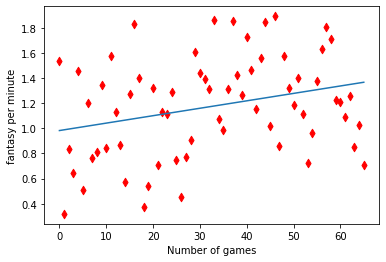

Mitchell Robinson


/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


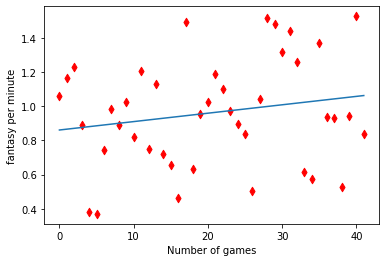

Elfrid Payton


/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


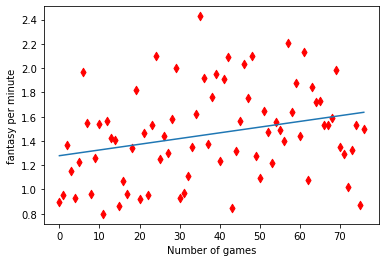

Karl-Anthony Towns


/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


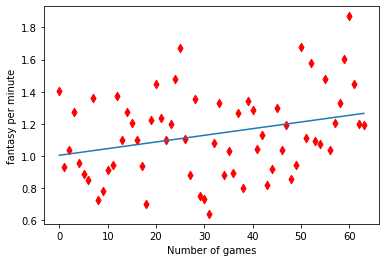

Devin Booker


In [53]:
for slug in df_improvement[df_improvement["y-intercept"] >= mean_fantasy_per_minute].sort_values(by="slope", ascending=False).head(5)["slug"].values:
    plot_player_stat(slug, stat="fantasy_per_minute")
    get_name_from_slug(slug)

Doncic, Mitchell Robinson, KAT, Booker, and Marvin Bagley are 5 young players are players who started off with decent efficiency, and has increased as the season went on. While we don't know if they can continue to improve at this rate, they're definitely players to keep an eye on. In fact, Doncic has improved quite a leap even compared to others. It's also interesting that Booker and KAT has continued to improve even after a few season in the NBA.

Let's look at players who has gotten the worst efficiency based on fantasy points

/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


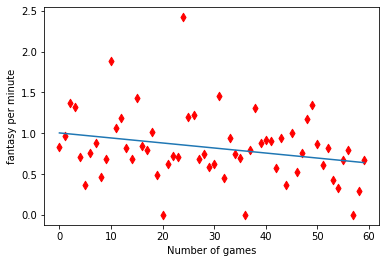

Aron Baynes


/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


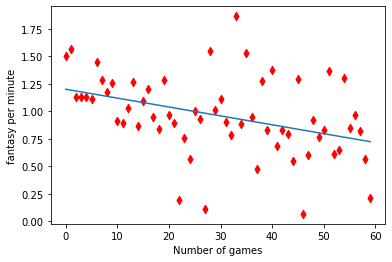

Nikola Mirotić


/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


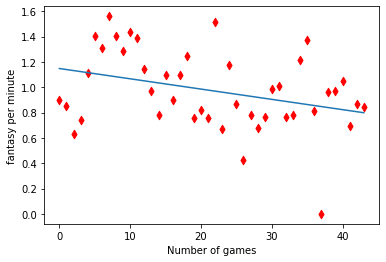

Wendell Carter


/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


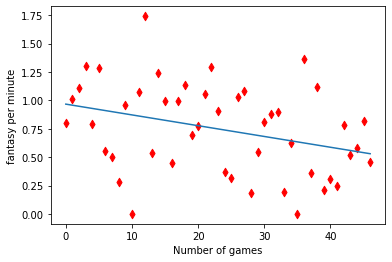

Sam Dekker


/home/joeyism/Programming/python/fantasy-basketball/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


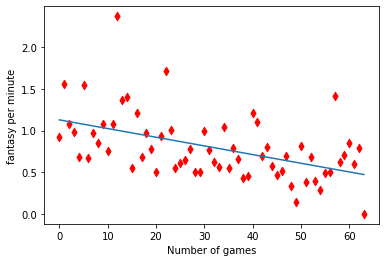

Michael Kidd-Gilchrist


In [54]:
for slug in df_improvement[df_improvement["y-intercept"] >= mean_fantasy_per_minute].sort_values(by="slope", ascending=False).tail(5)["slug"].values:
    plot_player_stat(slug, stat="fantasy_per_minute")
    get_name_from_slug(slug)

## Next Steps

This just shows a bit of what can be achieved in the data. While rebounds was lightly touched on, you can dive deeper into rebounds. That analysis can be also reproduced for assists, blocks, steals, FG%, 3pt FG%, FT%, 3s made, etc calculate which player is worth drafting the following season. Of course, you can combine stats to calculate stats such as [PER](https://www.basketball-reference.com/about/per.html), [offensive and defensive rating](https://www.basketball-reference.com/about/ratings.html), and [Win Shares](https://www.basketball-reference.com/about/ws.html)

## Just For Fun

April 10th is the last day of the season, so let's just take the regular season

In [55]:
df["date"] = pd.to_datetime(df["date"])

In [56]:
df_regular_season = df.loc[df["date"] <= '2019-04-10', :]

In [57]:
df_regular_season.groupby("team").sum()["fantasy_points"].sort_values(ascending=False)

team
Team.GOLDEN_STATE_WARRIORS     19749
Team.MILWAUKEE_BUCKS           19613
Team.OKLAHOMA_CITY_THUNDER     19102
Team.NEW_ORLEANS_PELICANS      19052
Team.PHILADELPHIA_76ERS        19020
Team.BOSTON_CELTICS            18857
Team.TORONTO_RAPTORS           18847
Team.UTAH_JAZZ                 18774
Team.SACRAMENTO_KINGS          18635
Team.DENVER_NUGGETS            18593
Team.MINNESOTA_TIMBERWOLVES    18546
Team.ATLANTA_HAWKS             18527
Team.LOS_ANGELES_LAKERS        18467
Team.WASHINGTON_WIZARDS        18450
Team.PORTLAND_TRAIL_BLAZERS    18372
Team.LOS_ANGELES_CLIPPERS      18192
Team.INDIANA_PACERS            18171
Team.HOUSTON_ROCKETS           18039
Team.ORLANDO_MAGIC             17977
Team.MIAMI_HEAT                17940
Team.CHARLOTTE_HORNETS         17900
Team.SAN_ANTONIO_SPURS         17890
Team.BROOKLYN_NETS             17801
Team.PHOENIX_SUNS              17596
Team.MEMPHIS_GRIZZLIES         17512
Team.DALLAS_MAVERICKS          17419
Team.DETROIT_PISTONS           17

In the regular season, GSW and Bucks had the best fantasy points. Surprisingly, New Orleans and OKC had really high points, and Dallas and Pistons has really low points despite their higher position overall. I wonder if it's related to pace and defense, which doesn't show up on stats. T

Let's look at distribution of fantasy points for a few teams

In [58]:
def plot_fantasy_points_per_player_for_team(team):
    plt.ylabel("fantasy points")
    plt.title(team.split(".")[1])
    df[df["team"] == team].groupby("name").sum()["fantasy_points"].sort_values().plot.bar()

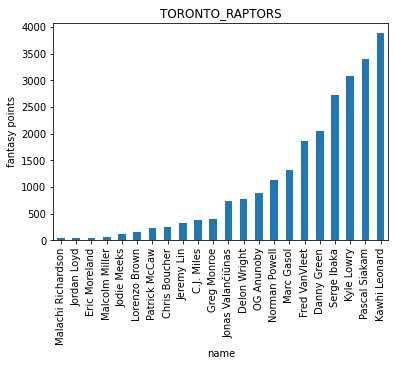

In [59]:
plot_fantasy_points_per_player_for_team("Team.TORONTO_RAPTORS")

This looks pretty good for a team

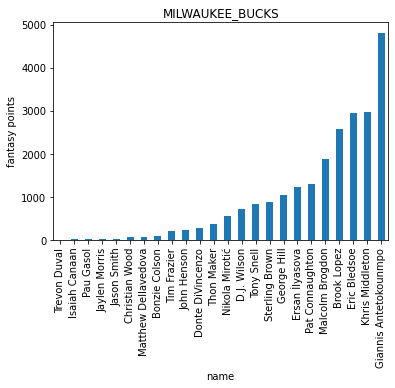

In [60]:
plot_fantasy_points_per_player_for_team("Team.MILWAUKEE_BUCKS")

One guy dominates

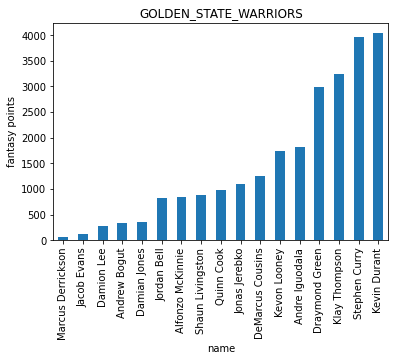

In [61]:
plot_fantasy_points_per_player_for_team("Team.GOLDEN_STATE_WARRIORS")

Top 4 dominates, and top 2 really dominates

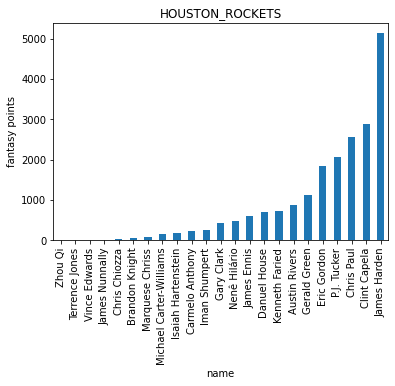

In [62]:
plot_fantasy_points_per_player_for_team("Team.HOUSTON_ROCKETS")

Much like Bucks, one guy dominates, but he dominates harder and has less help

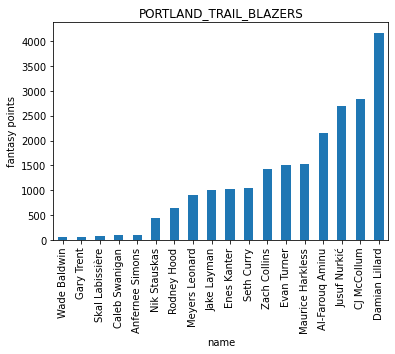

In [63]:
plot_fantasy_points_per_player_for_team("Team.PORTLAND_TRAIL_BLAZERS")

Dropoff from Lillard to McCollum was actually pretty significant. McCollum's fantasy points is similar to that of Capella, lower than Middleton.